In [363]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts
from scipy import stats

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [364]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [365]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [366]:
# Combine the data into a single dataset

new_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
new_df



Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [367]:
new_df.rename(columns={'Tumor Volume (mm3)':'Tumor_Volume'},inplace=True)
new_df



Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor_Volume  Metastatic Sites  
0        45.000000                 0  
1        38.825898                 0  
2        35.014271                 1  
3        34.223992                 1  
4        32.997729                 1  
...            ...               ...  
1888     63.145652                 2  
1889     65.841013                 3  
1890     69.176246                 4  
1891     70.314904                 4  
1892     73.867845                 4  

[1893 rows x 8 columns]

In [368]:
study_results.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>


tumor = new_df['Tumor_Volume']
tumor.describe()

In [369]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

count_datapoints = new_df.groupby('Drug Regimen').count()['Tumor_Volume']
print(count_datapoints)

mean_tumor = new_df.groupby('Drug Regimen').mean()['Tumor_Volume']
print(mean_tumor)

median_tumor = new_df.groupby('Drug Regimen').median()['Tumor_Volume']
print(median_tumor)

var_tumor = new_df.groupby('Drug Regimen').var()['Tumor_Volume']
print(var_tumor)

sd_tumor = new_df.groupby('Drug Regimen').std()['Tumor_Volume']
print(sd_tumor)

sem_tumor = new_df.groupby('Drug Regimen').sem()['Tumor_Volume']
print(sem_tumor)

summary_table = pd.DataFrame({"Drug Entries":count_datapoints,
                              "Mean Tumor Vol":mean_tumor,
                             "Median Tumor Vol":median_tumor,
                             "Variance Tumor Vol":var_tumor,
                             "Std Dev Tumor Vol":sd_tumor,
                             "SEM Tumor Vol":sem_tumor})

summary_table

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor_Volume, dtype: int64
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor_Volume, dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor_Volume, dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zonifero

Drug Entries  Mean Tumor Vol  Median Tumor Vol  \
Drug Regimen                                                   
Capomulin              230       40.675741         41.557809   
Ceftamin               178       52.591172         51.776157   
Infubinol              178       52.884795         51.820584   
Ketapril               188       55.235638         53.698743   
Naftisol               186       54.331565         52.509285   
Placebo                181       54.033581         52.288934   
Propriva               161       52.322552         50.854632   
Ramicane               228       40.216745         40.673236   
Stelasyn               181       54.233149         52.431737   
Zoniferol              182       53.236507         51.818479   

              Variance Tumor Vol  Std Dev Tumor Vol  SEM Tumor Vol  
Drug Regimen                                                        
Capomulin              24.947764           4.994774       0.329346  
Ceftamin               39.290177           6.268188       0.469821  
Infubinol              43.128684           6.567243       0.492236  
Ketapril               68.553577           8.279709       0.603860  
Naftisol               66.173479           8.134708       0.596466  
Placebo                61.168083           7.821003       0.581331  
Propriva               42.351070           6.507770       0.512884  
Ramicane               23.486704           4.846308       0.320955  
Stelasyn               59.450562           7.710419       0.573111  
Zoniferol              48.533355           6.966589       0.516398

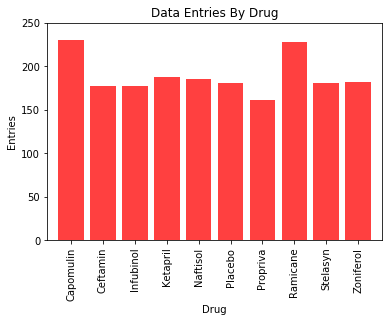

In [370]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.title("Data Entries By Drug")
plt.xlabel("Drug")
plt.ylabel("Entries")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(count_datapoints+20))
plt.xticks(rotation=90)

plt.bar(x_axis, count_datapoints, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs)
plt.show()

In [371]:
 # Filter the DataFrame down only to those columns to chart
drug_entries = summary_table[["Drug Entries"]]

drug_entries.head()

Drug Entries
Drug Regimen              
Capomulin              230
Ceftamin               178
Infubinol              178
Ketapril               188
Naftisol               186

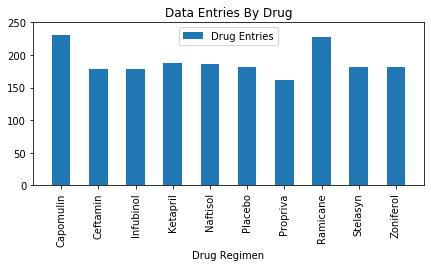

In [372]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Use DataFrame.plot() in order to create a bar chart of the data
drug_entries.plot(kind="bar", figsize=(7,3))

# Set a title for the chart
plt.title("Data Entries By Drug")

#Create Chart
plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(count_datapoints+20))
plt.xticks(tick_locations, drugs)
plt.show()

In [373]:
gender = new_df.groupby('Sex').count()['Mouse ID']
print(gender)




Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


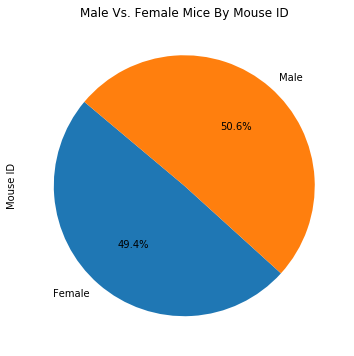

<Figure size 432x288 with 0 Axes>

In [374]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Use DataFrame.plot() in order to create a bar chart of the data
gender.plot(kind="pie", figsize=(10,6), autopct="%1.1f%%", startangle=140)

# Set a title for the chart
plt.title("Male Vs. Female Mice By Mouse ID")

plt.show()
plt.tight_layout()

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


([<matplotlib.patches.Wedge at 0x20e8bcc1278>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

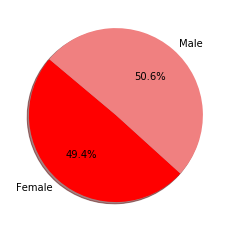

In [375]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [gender]
    
# The colors of each section of the pie chart
colors = ["red", "lightcoral"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [376]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = new_df[(new_df['Drug Regimen'] == 'Capomulin')]


ramicane_df = new_df[(new_df['Drug Regimen'] == 'Ramicane')]


infubinol_df = new_df[(new_df['Drug Regimen'] == 'Infubinol')]


ceftamin_df = new_df[(new_df['Drug Regimen'] == 'Ceftamin')]



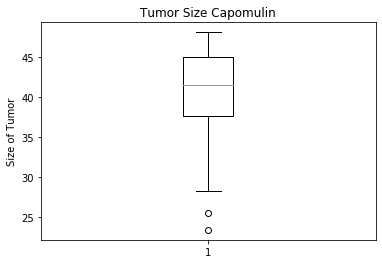

In [377]:
tumor_size_cap = capomulin_df['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Capomulin')
ax1.set_ylabel('Size of Tumor')
ax1.boxplot(tumor_size_cap)
plt.show()


In [378]:
quartiles = tumor_size_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Size is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Size is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Size is: {iqr}")
print(f"The the median of Capomulin Tumor Size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor Size is: 37.685932865
The upper quartile of Capomulin Tumor Size is: 45.0
The interquartile range of Capomulin Tumor Size is: 7.314067135000002
The the median of Capomulin Tumor Size is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


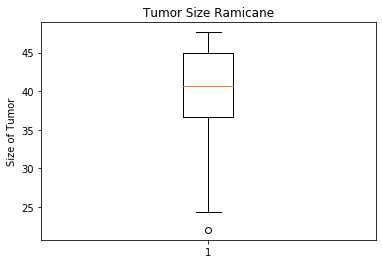

In [379]:
tumor_size_ram = ramicane_df['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Ramicane')
ax1.set_ylabel('Size of Tumor')
ax1.boxplot(tumor_size_ram)
plt.show()


In [380]:
quartiles = tumor_size_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Size is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Size is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Size is: {iqr}")
print(f"The the median of Ramicane Tumor Size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumor Size is: 36.67463458499999
The upper quartile of Ramicane Tumor Size is: 45.0
The interquartile range of Ramicane Tumor Size is: 8.325365415000007
The the median of Ramicane Tumor Size is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


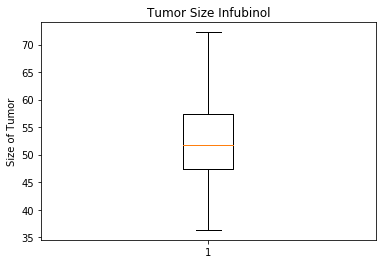

In [381]:
tumor_size_inf = infubinol_df['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Infubinol')
ax1.set_ylabel('Size of Tumor')
ax1.boxplot(tumor_size_inf)
plt.show()


In [382]:
quartiles = tumor_size_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Size is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Size is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Size is: {iqr}")
print(f"The the median of Infubinol Tumor Size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Size is: 47.3123533
The upper quartile of Infubinol Tumor Size is: 57.314443967500004
The interquartile range of Infubinol Tumor Size is: 10.002090667500006
The the median of Infubinol Tumor Size is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


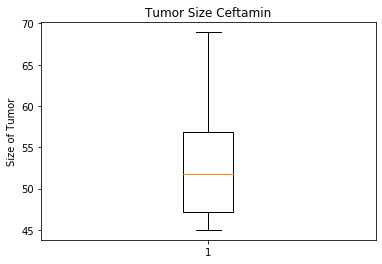

In [383]:
tumor_size_ceft = ceftamin_df['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Ceftamin')
ax1.set_ylabel('Size of Tumor')
ax1.boxplot(tumor_size_ceft)
plt.show()


In [384]:
quartiles = tumor_size_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumor Size is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumor Size is: {upperq}")
print(f"The interquartile range of Ceftamin Tumor Size is: {iqr}")
print(f"The the median of Ceftamin Tumor Size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor Size is: 47.208427112500004
The upper quartile of Ceftamin Tumor Size is: 56.801437570000004
The interquartile range of Ceftamin Tumor Size is: 9.5930104575
The the median of Ceftamin Tumor Size is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


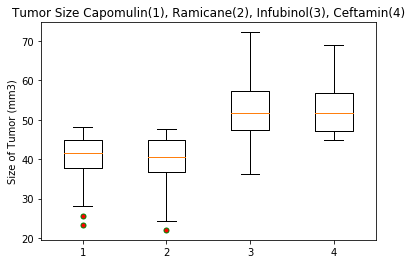

In [385]:
#Create Index of tumor data by drug
drug_data = [tumor_size_cap,tumor_size_ram,tumor_size_inf,tumor_size_ceft]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Capomulin(1), Ramicane(2), Infubinol(3), Ceftamin(4)')
ax1.set_ylabel('Size of Tumor (mm3)')
columns =['Capomulin', 'Ramicane','Infubinol','Ceftamin']

#Add outlier colors and show boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=5,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(drug_data, flierprops=flierprops)
plt.show()


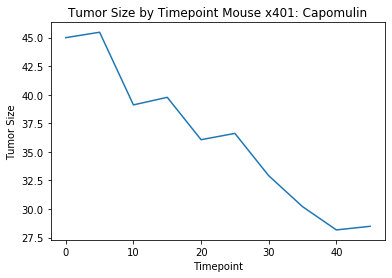

In [386]:
# Generate a line plot of time point versus tumor volume for all mice treated with Capomulin

mouse_id_df = new_df[(new_df['Mouse ID'] == 'x401')]

x_axis = mouse_id_df['Timepoint']
y_axis = mouse_id_df['Tumor_Volume']

# Create a graph based upon the two lists we have created
plt.plot(x_axis, y_axis)
plt.title("Tumor Size by Timepoint Mouse x401: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")

plt.show()


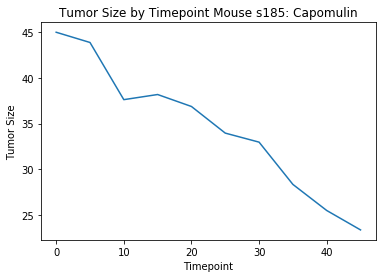

In [387]:
# Generate a line plot of time point versus tumor volume for all mice treated with Capomulin

mouse_id_df = new_df[(new_df['Mouse ID'] == 's185')]

x_axis = mouse_id_df['Timepoint']
y_axis = mouse_id_df['Tumor_Volume']

# Create a graph based upon the two lists we have created
plt.plot(x_axis, y_axis)
plt.title("Tumor Size by Timepoint Mouse s185: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")

plt.show()

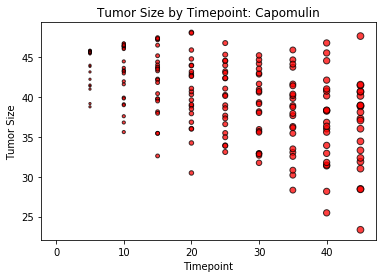

In [388]:
# Generate a scatter plot of time point versus tumor volume for all mice treated with Capomulin

x_axis = capomulin_df['Timepoint']
y_axis = capomulin_df['Tumor_Volume']

# Create a graph based upon the two lists we have created
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Size by Timepoint: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")

plt.show()




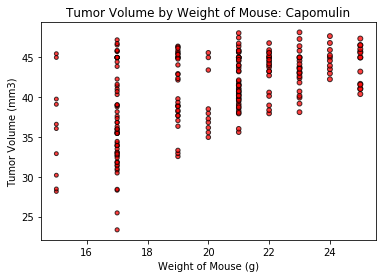

In [389]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = capomulin_df['Weight (g)']
y_axis = capomulin_df['Tumor_Volume']

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Volume by Weight of Mouse: Capomulin")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [390]:
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between weight in grams and tumor volume in mm3 is {round(correlation[0],2)} showing a positive correlation between these two factors")

The correlation between weight in grams and tumor volume in mm3 is 0.53 showing a positive correlation between these two factors


In [391]:
# Perform a linear regression on weight of mouse versus tumor volume
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis,y_axis)

In [392]:
 # Create equation of line weight x tumor volume (mm3)
vc_fit = vc_slope * x_axis + vc_int

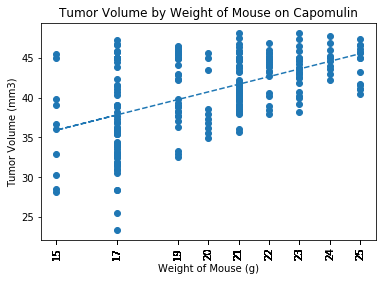

In [393]:
# Plot the linear model on top of scatter plot 
mouse_weight = capomulin_df.iloc[:,4]
tumor_volume_calc = capomulin_df.iloc[:,6]
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,vc_fit,"--")
plt.xticks(x_axis, rotation=90)
plt.title('Tumor Volume by Weight of Mouse on Capomulin')
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [394]:
# Calculate the tumor size of a 30 g mouse
thirty_gram_mouse = 30
print(f"The calculated tumor size of a mouse that is 30 grams and on Capomulin will be {round(vc_slope * thirty_gram_mouse + vc_int,2)}.")

ten_gram_mouse = 10
print(f"The calculated tumor size of a mouse that is 10 grams and on Capomulin will be {round(vc_slope * ten_gram_mouse + vc_int,2)}.")


The calculated tumor size of a mouse that is 30 grams and on Capomulin will be 50.32.
The calculated tumor size of a mouse that is 10 grams and on Capomulin will be 31.1.


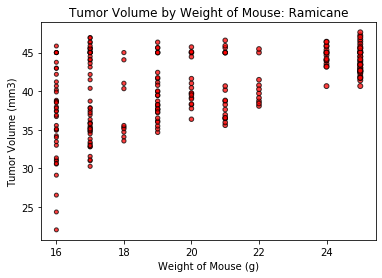

In [395]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Ramicane regimen
x_axis = ramicane_df['Weight (g)']
y_axis = ramicane_df['Tumor_Volume']

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Volume by Weight of Mouse: Ramicane")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel("Tumor Volume (mm3)")

plt.show()

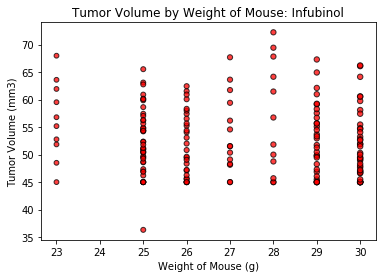

In [396]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Infubinol regimen
x_axis = infubinol_df['Weight (g)']
y_axis = infubinol_df['Tumor_Volume']

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Volume by Weight of Mouse: Infubinol")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel("Tumor Volume (mm3)")

plt.show()

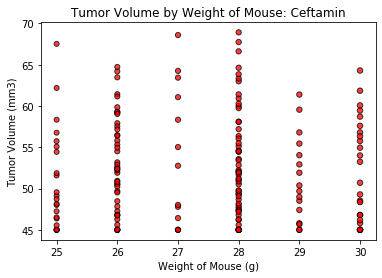

In [397]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Ceftamin regimen
x_axis = ceftamin_df['Weight (g)']
y_axis = ceftamin_df['Tumor_Volume']

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Volume by Weight of Mouse: Ceftamin")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel("Tumor Volume (mm3)")

plt.show()